<a href="https://colab.research.google.com/github/anizmo/anizmo.github.io/blob/master/DMT_Assignment_8_potdar_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 8 - Decision Tree

In [ ]:
# Importing all the necessary dependencies
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import graphviz
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
from pandas.io.formats.format import DataFrameRenderer

## Loading the Boston Housing-Prices dataset

In [ ]:
# Importing the Boston Housing Dataset from sklearn
data = load_boston()
feature_names = data.feature_names
X = data.data
y = data.target

In [ ]:
feature_names = data.feature_names
print(feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


### Split the range of target values into three equal parts - low, mid, and high. Reassign the target values into into three categorical values 0, 1, and 2, representing low, mid and high range of values, respectively.

In [ ]:
segmented_data = np.empty(len(y), dtype=int)
df = pd.DataFrame(y).describe(percentiles = [0.333,0.666,0.999])
# Getting the 33 Percentile Value from the Describe DataFrame
thirtyThirdQuantile = df.values[4]
# Getting the 66 Percentile Value from the Describe DataFrame
sixtySixthQuantile = df.values[6]
# Getting the 99 Percentile Value from the Describe DataFrame
ninetyNinthQuantile = df.values[7]

position = 0

# Looping through the target values 
for target_values in y:
  if (target_values <= thirtyThirdQuantile):
    segmented_data[position] = 0
    position+=1
  elif(target_values <= sixtySixthQuantile):
    segmented_data[position] = 1
    position+=1
  else:
    segmented_data[position] = 2
    position+=1

segmented_data

array([2, 1, 2, 2, 2, 2, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 0, 0, 1, 2, 2, 1,
       1, 1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 1, 1, 1, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2,

## Split the dataset into training and test sets (70, 30).

In [ ]:
colx_train, colx_test, coly_train, coly_test = train_test_split(X, 
                                                                np.array(segmented_data), 
                                                                test_size =0.3)
  
print("colx_train shape : ", colx_train.shape)
print("colx_test shape  : ", colx_test.shape)
print("coly_train shape : ", coly_train.shape)
print("coly_test shape  : ", coly_test.shape)

colx_train shape :  (354, 13)
colx_test shape  :  (152, 13)
coly_train shape :  (354,)
coly_test shape  :  (152,)


### Using scikit-learn’s DecisionTreeClassifier, train a supervised learning model that can be used to generate predictions for your data.

In [ ]:
# Fitting the Decision Tree
decTreeClf = tree.DecisionTreeClassifier()
decTreeClf = decTreeClf.fit(colx_train, coly_train)

### Report the tree depth, number of leaves, feature importance, train score, and test score of the tree. Let the tree depth be Td.

In [ ]:
# Reporting the parameters
t = decTreeClf.tree_.max_depth
print("Max Tree Depth: ", decTreeClf.tree_.max_depth)
print("Number of leaves: ", decTreeClf.tree_.n_leaves)
print("Feature Importance: ", decTreeClf.tree_.compute_feature_importances())
print("Tree Depth: ", decTreeClf.get_depth())
print("Train Score: ", decTreeClf.score(colx_train, coly_train))
print("Test Score: ", decTreeClf.score(colx_test, coly_test))

Max Tree Depth:  14
Number of leaves:  65
Feature Importance:  [0.0405538  0.         0.01281688 0.         0.06950222 0.24910252
 0.07011965 0.09450906 0.02382017 0.0284677  0.01872714 0.0575929
 0.33478796]
Tree Depth:  14
Train Score:  1.0
Test Score:  0.7105263157894737


### Show the visual output of the decision tree.

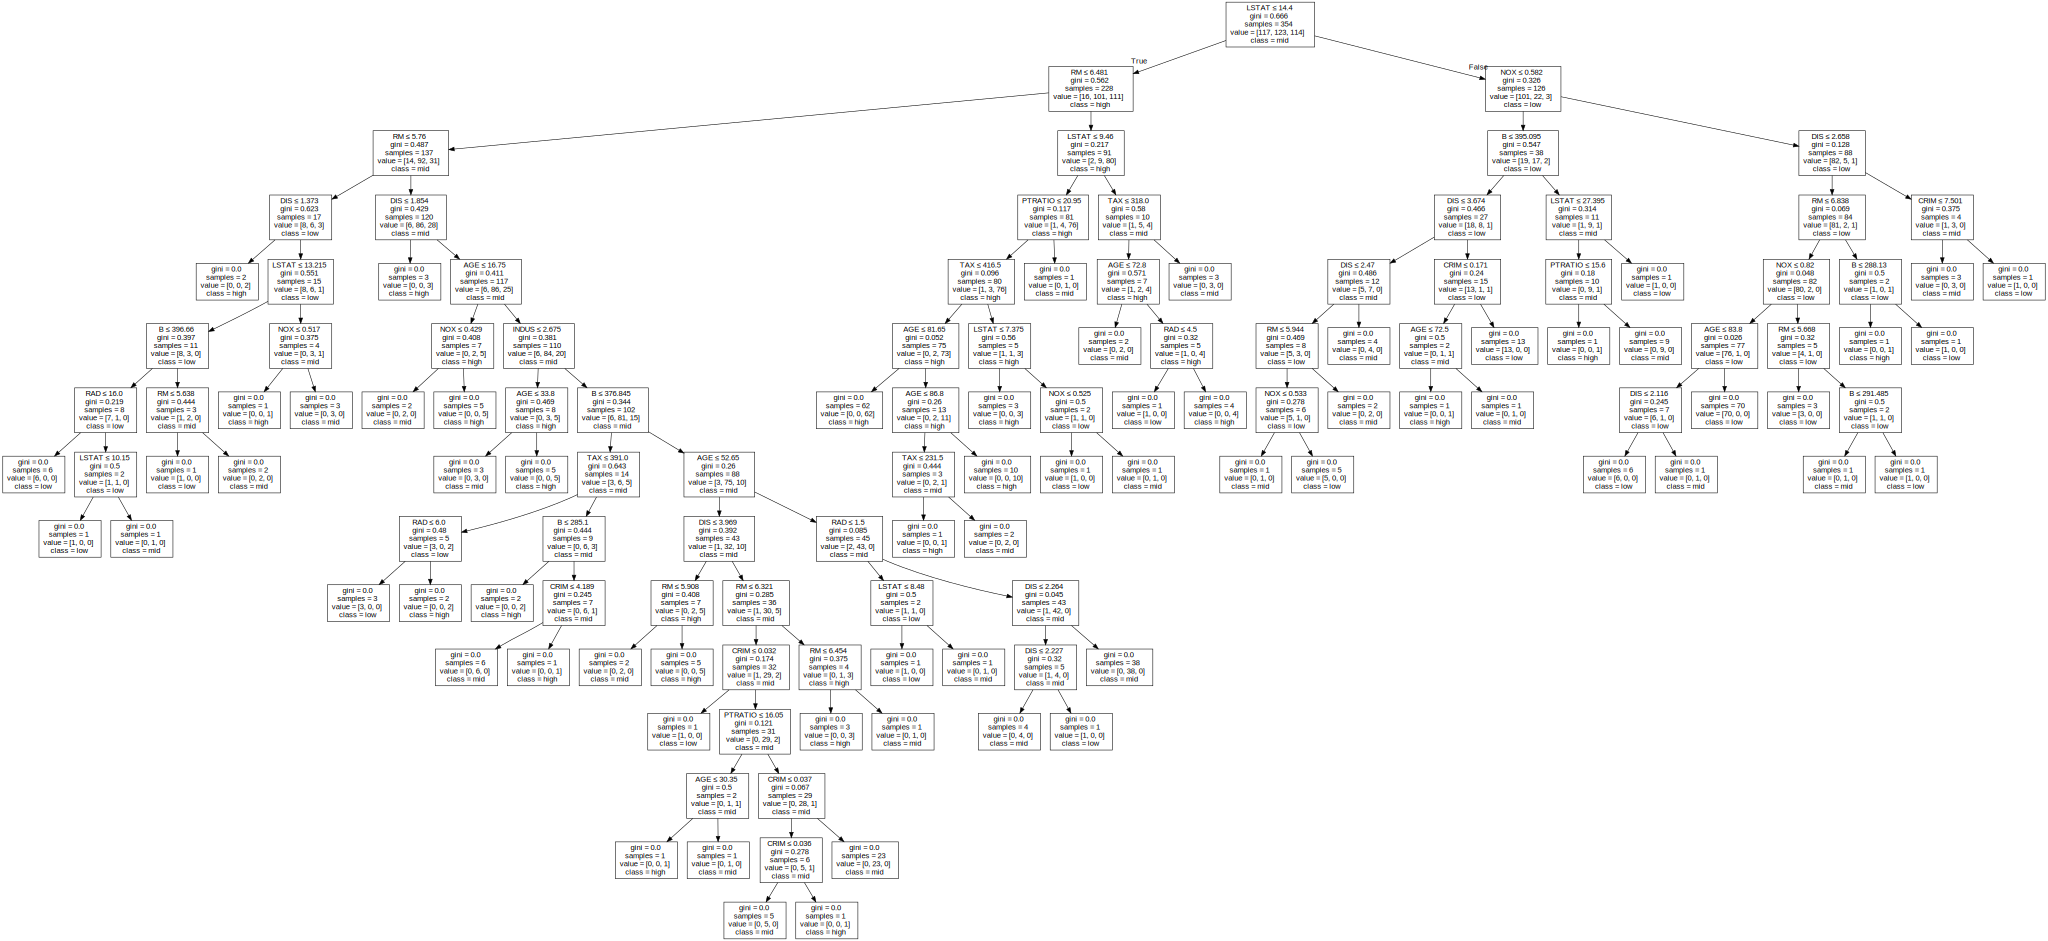

In [ ]:
# Rendering the decision tree output
dot_data = tree.export_graphviz(decTreeClf,
                                out_file=None,
                                feature_names = feature_names,
                                class_names=['low','mid','high'],
                                special_characters=True)  

graph = graphviz.Source(dot_data)
graph

### Next, Generate (Td-1) decision trees on the same training set using fixed tree depths {1, 2, ...(T d −1)}. The tree depth can be set using max=d, where d is the depth of the tree.
### For each of the (Td-1) trees report, tree depth, number of leaves, feature importance, train score, and test score of the tree.

Tree Depth:  1
Leaves:  2
Feature Importances:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Train Score:  0.5988700564971752
Test Score:  0.6052631578947368


Tree Depth:  2
Leaves:  4
Feature Importances:  [0.         0.         0.         0.         0.         0.35457214
 0.         0.07709379 0.         0.         0.         0.
 0.56833407]
Train Score:  0.7711864406779662
Test Score:  0.756578947368421


Tree Depth:  3
Leaves:  8
Feature Importances:  [0.         0.         0.         0.         0.06692969 0.34226055
 0.         0.02932779 0.         0.         0.         0.03510297
 0.526379  ]
Train Score:  0.807909604519774
Test Score:  0.7302631578947368


Tree Depth:  4
Leaves:  16
Feature Importances:  [0.00989008 0.         0.         0.         0.05961776 0.31100702
 0.         0.08465597 0.         0.01186809 0.01191083 0.03126804
 0.47978222]
Train Score:  0.8418079096045198
Test Score:  0.756578947368421


Tree Depth:  5
Leaves:  25
Feature Importances:  [0.01541633 0.     

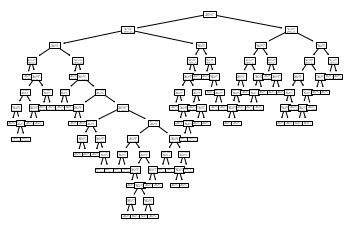

In [ ]:
max_test_score = 0
highest_depth = 0

# Generating (Td-1) decision trees on the same training set using fixed tree depths.
for i in range(1, t):
  # Reporting Tree Parameters.
  print("Tree Depth: ", i)
  treeClassifier = tree.DecisionTreeClassifier(max_depth=i)
  treeClassifier = treeClassifier.fit(colx_train, coly_train)
  print("Leaves: ", treeClassifier.tree_.n_leaves)
  print("Feature Importances: ", treeClassifier.tree_.compute_feature_importances())
  train_score = treeClassifier.score(colx_train, coly_train)
  test_score = treeClassifier.score(colx_test, coly_test)
  print("Train Score: ", train_score)
  print("Test Score: ", test_score)
  tree.plot_tree(treeClassifier)
  print("\n")
  if test_score > max_test_score:
    max_test_score = test_score
    highest_depth = i

print("Max Test Score: ", max_test_score)
print("Highest Score Depth: ", highest_depth)

### Show the visual output of the decision tree with highest test score from the (Td-1) trees. To visualize the decision tree, use Graphviz library. You can find details in this link. Show the feature names and class names in the visualization.

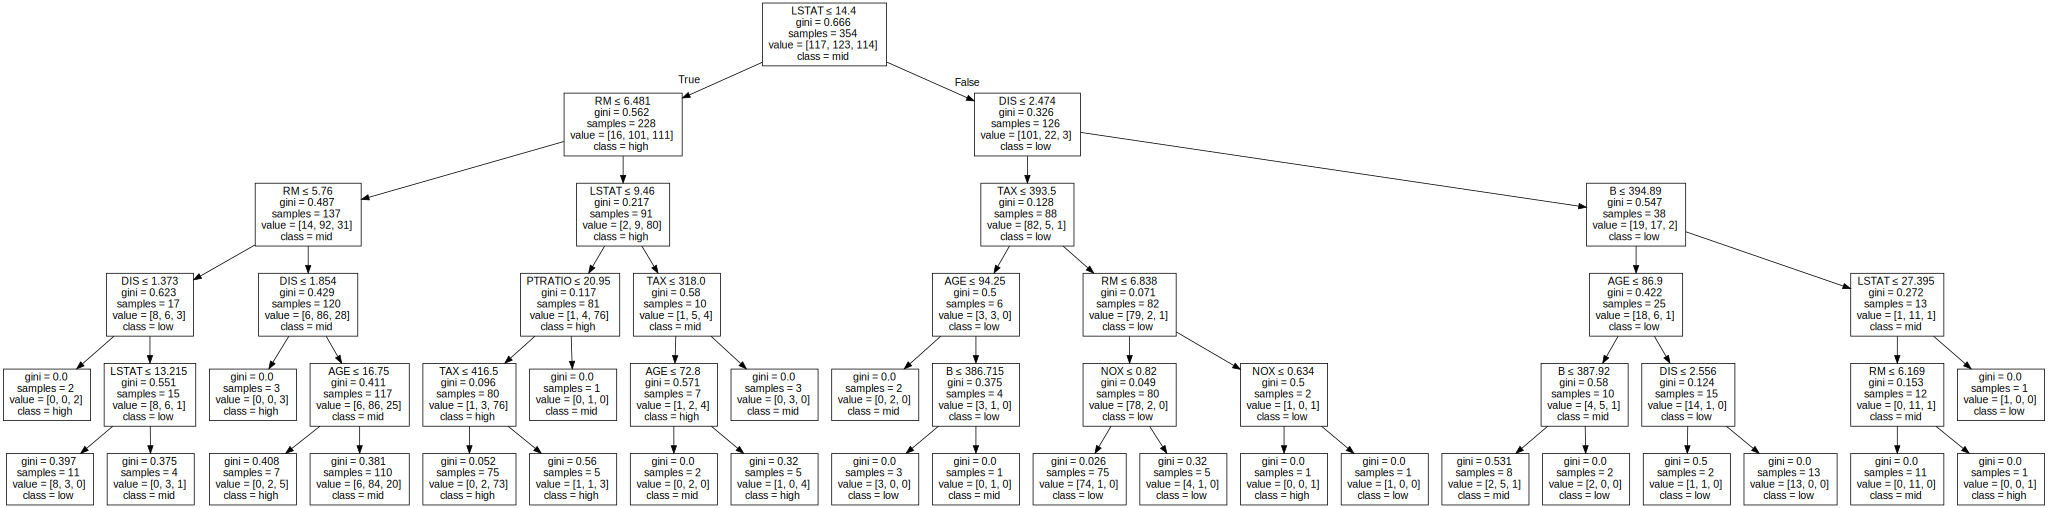

In [ ]:
# Rendering the visual output of the Decision Tree that has the highest test score.
decTreeClf = tree.DecisionTreeClassifier(max_depth = highest_depth)
decTreeClf = decTreeClf.fit(colx_train, coly_train)
dot_data = tree.export_graphviz(decTreeClf, out_file = None,
                                feature_names = feature_names,
                                class_names=['low','mid','high'],
                                special_characters = True)

graph = graphviz.Source(dot_data)
graph 